In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# load the dataset
df = pd.read_csv('mtn_customer_churn.csv')
df.head()

,Customer ID,Full Name,Date of Purchase,Age,State,MTN Device,Gender,Satisfaction Rate,Customer Review,Customer Tenure in months,Subscription Plan,Unit Price,Number of Times Purchased,Total Revenue,Data Usage,Customer Churn Status,Reasons for Churn
0,CUST0001,Ngozi Berry,Jan-25,27,Kwara,4G Router,Male,2,Fair,2,165GB Monthly Plan,35000,19,665000,44.48,Yes,Relocation
1,CUST0002,Zainab Baker,Mar-25,16,Abuja (FCT),Mobile SIM Card,Female,2,Fair,22,12.5GB Monthly Plan,5500,12,66000,19.79,Yes,Better Offers from Competitors
2,CUST0003,Saidu Evans,Mar-25,21,Sokoto,5G Broadband Router,Male,1,Poor,60,150GB FUP Monthly Unlimited,20000,8,160000,9.64,No,NaN
3,CUST0003,Saidu Evans,Mar-25,21,Sokoto,Mobile SIM Card,Male,1,Poor,60,1GB+1.5mins Daily Plan,500,8,4000,197.05,No,NaN
4,CUST0003,Saidu Evans,Mar-25,21,Sokoto,Broadband MiFi,Male,1,Poor,60,30GB Monthly Broadband Plan,9000,15,135000,76.34,No,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer ID                974 non-null    object 
 1   Full Name                  974 non-null    object 
 2   Date of Purchase           974 non-null    object 
 3   Age                        974 non-null    int64  
 4   State                      974 non-null    object 
 5   MTN Device                 974 non-null    object 
 6   Gender                     974 non-null    object 
 7   Satisfaction Rate          974 non-null    int64  
 8   Customer Review            974 non-null    object 
 9   Customer Tenure in months  974 non-null    int64  
 10  Subscription Plan          974 non-null    object 
 11  Unit Price                 974 non-null    int64  
 12  Number of Times Purchased  974 non-null    int64  
 13  Total Revenue              974 non-null    int64  

In [3]:
df.describe()

,Age,Satisfaction Rate,Customer Tenure in months,Unit Price,Number of Times Purchased,Total Revenue,Data Usage
count,974.000000,974.000000,974.000000,974.000000,974.000000,9.740000e+02,974.000000
mean,48.043121,2.947639,31.422998,19196.663244,10.564682,2.046696e+05,99.304764
std,17.764307,1.384219,17.191256,25586.726985,5.709427,3.247855e+05,57.739511
min,16.000000,1.000000,1.000000,350.000000,1.000000,3.500000e+02,0.820000
25%,32.000000,2.000000,17.000000,5500.000000,5.000000,3.300000e+04,47.637500
50%,49.000000,3.000000,31.000000,14500.000000,11.000000,1.080000e+05,103.330000
75%,63.750000,4.000000,47.000000,24000.000000,15.000000,2.610000e+05,149.697500
max,80.000000,5.000000,60.000000,150000.000000,20.000000,3.000000e+06,200.000000


### Examining the Distribution of the Target Variable ('Customer Churn Status')

Distribution of Customer Churn Status:
 Customer Churn Status
No     690
Yes    284
Name: count, dtype: int64


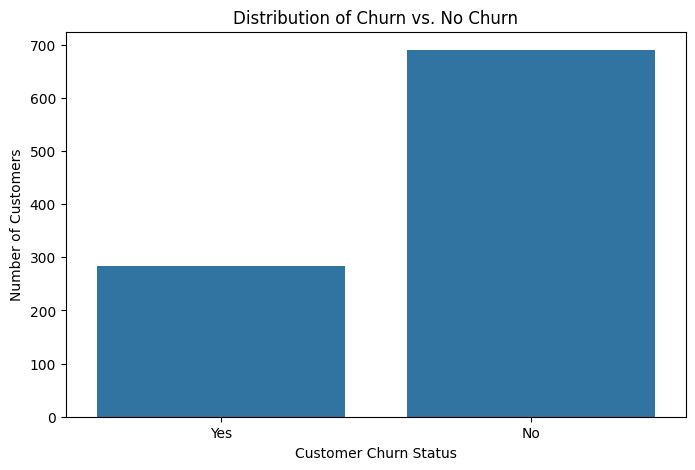

In [4]:
churn_distribution = df['Customer Churn Status'].value_counts()
print("Distribution of Customer Churn Status:\n", churn_distribution)

# Visualize the distribution of churn vs. no churn
plt.figure(figsize=(8, 5))
sns.countplot(x='Customer Churn Status', data=df)
plt.title('Distribution of Churn vs. No Churn')
plt.xlabel('Customer Churn Status')
plt.ylabel('Number of Customers')
plt.show()

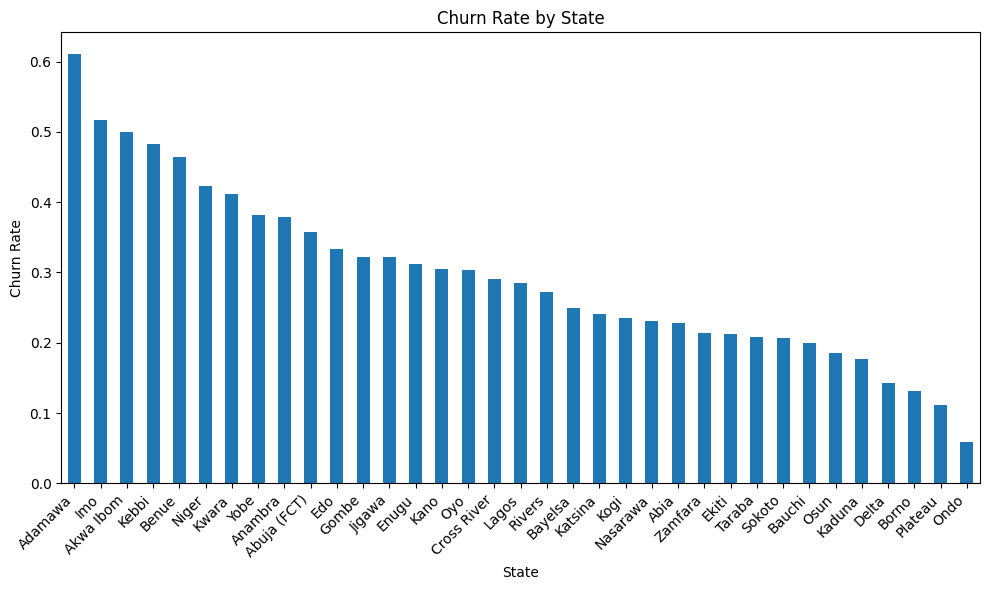

In [5]:
# Analyze churn rate by 'State'
churn_by_state = df.groupby('State')['Customer Churn Status'].value_counts(normalize=True).unstack().fillna(0)
churn_by_state['Yes'].sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('Churn Rate by State')
plt.xlabel('State')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

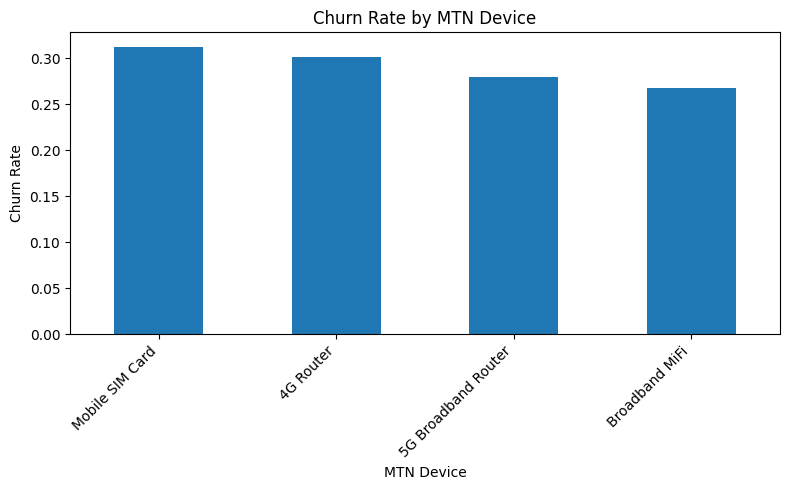

In [6]:
# Analyze churn rate by 'MTN Device'
churn_by_device = df.groupby('MTN Device')['Customer Churn Status'].value_counts(normalize=True).unstack().fillna(0)
churn_by_device['Yes'].sort_values(ascending=False).plot(kind='bar', figsize=(8, 5))
plt.title('Churn Rate by MTN Device')
plt.xlabel('MTN Device')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

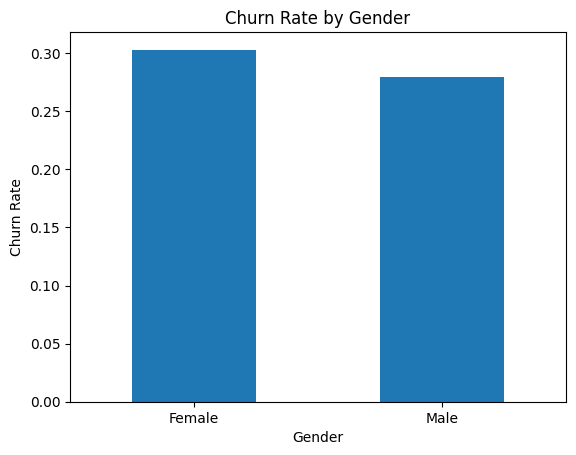

In [7]:
# Analyze churn rate by 'Gender'
churn_by_gender = df.groupby('Gender')['Customer Churn Status'].value_counts(normalize=True).unstack().fillna(0)
churn_by_gender['Yes'].plot(kind='bar')
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)
plt.show()

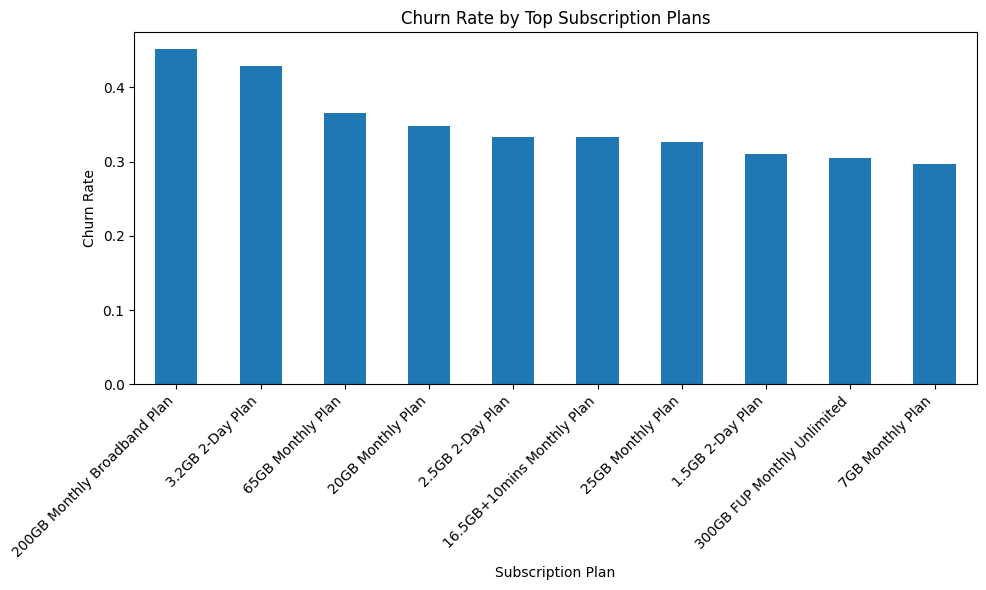

In [8]:
# Analyze churn rate by 'Subscription Plan' (showing only the top few for readability)
churn_by_plan = df.groupby('Subscription Plan')['Customer Churn Status'].value_counts(normalize=True).unstack().fillna(0)
top_plans = churn_by_plan['Yes'].sort_values(ascending=False).head(10) # Adjust number as needed
top_plans.plot(kind='bar', figsize=(10, 6))
plt.title('Churn Rate by Top Subscription Plans')
plt.xlabel('Subscription Plan')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

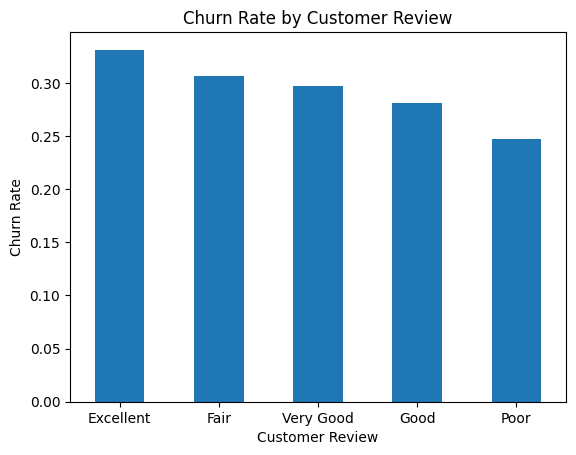

In [9]:
# Analyze churn rate by 'Customer Review'
churn_by_review = df.groupby('Customer Review')['Customer Churn Status'].value_counts(normalize=True).unstack().fillna(0)
churn_by_review['Yes'].sort_values(ascending=False).plot(kind='bar')
plt.title('Churn Rate by Customer Review')
plt.xlabel('Customer Review')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)
plt.show()

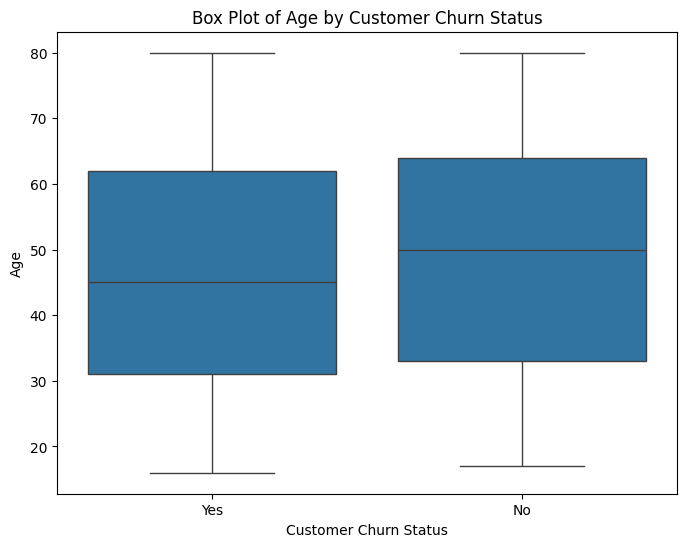

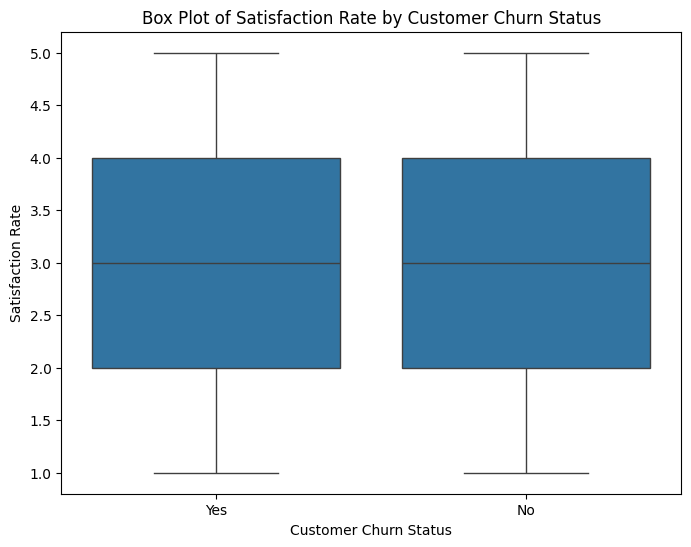

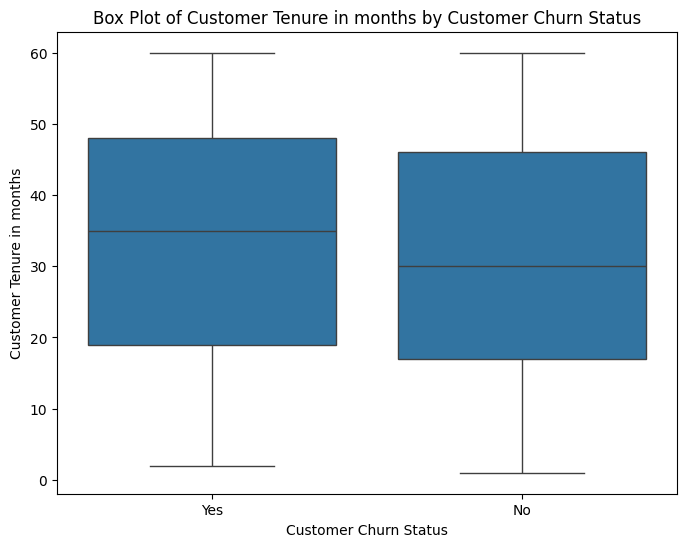

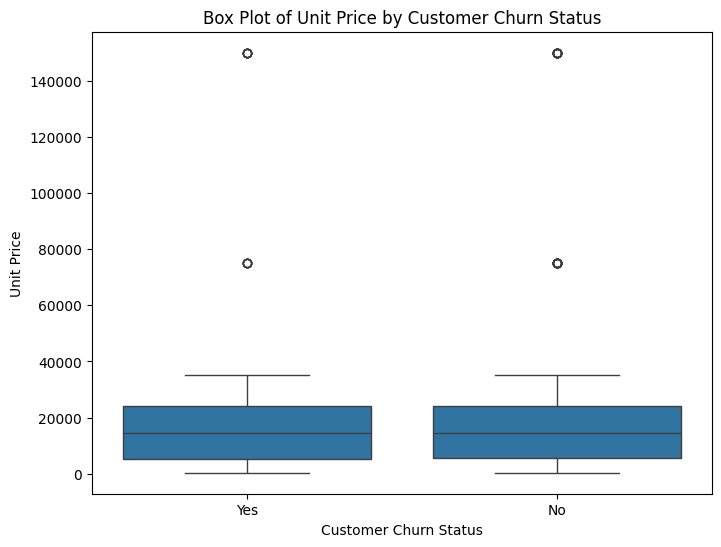

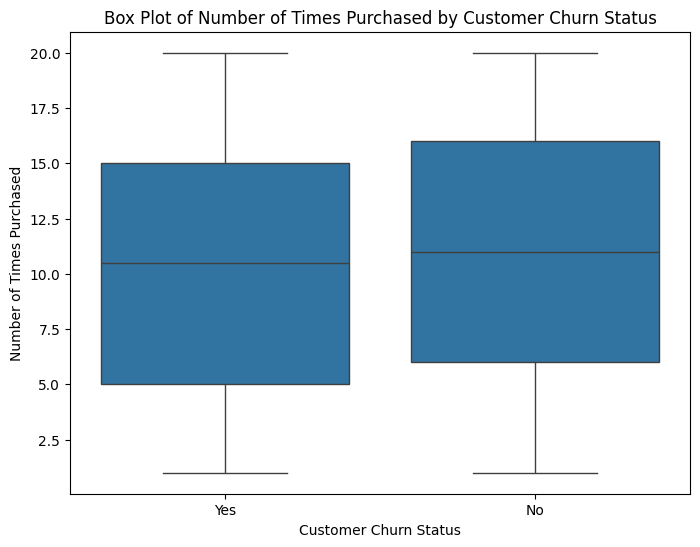

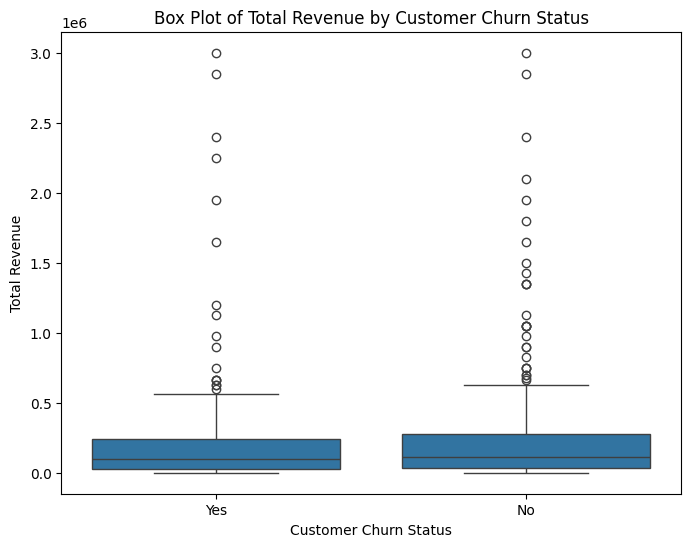

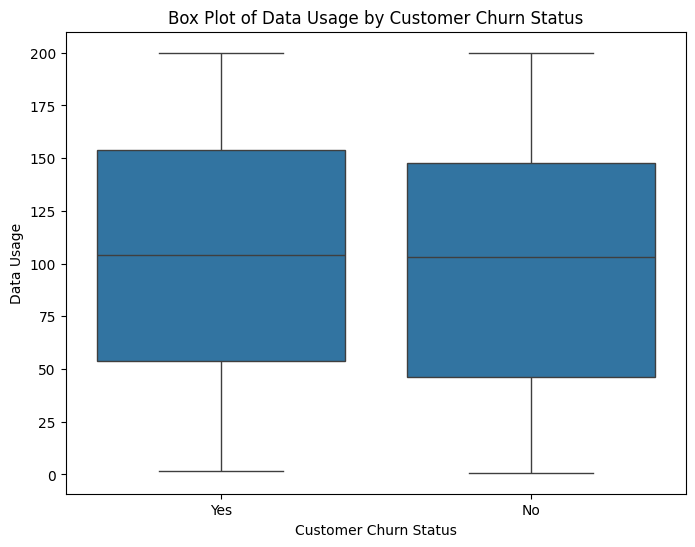

In [10]:
numerical_features = ['Age', 'Satisfaction Rate', 'Customer Tenure in months',
                      'Unit Price', 'Number of Times Purchased', 'Total Revenue', 'Data Usage']

for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Customer Churn Status', y=feature, data=df)
    plt.title(f'Box Plot of {feature} by Customer Churn Status')
    plt.xlabel('Customer Churn Status')
    plt.ylabel(feature)
    plt.show()

In [11]:
numerical_features = ['Age', 'Satisfaction Rate', 'Customer Tenure in months',
                      'Unit Price', 'Number of Times Purchased', 'Total Revenue', 'Data Usage']

churn_stats = df.groupby('Customer Churn Status')[numerical_features].agg(['mean', 'median'])
print(churn_stats)

                             Age        Satisfaction Rate         \
                            mean median              mean median   
Customer Churn Status                                              
No                     48.592754   50.0          2.905797    3.0   
Yes                    46.707746   45.0          3.049296    3.0   

                      Customer Tenure in months           Unit Price           \
                                           mean median          mean   median   
Customer Churn Status                                                           
No                                    30.724638   30.0  19442.536232  14500.0   
Yes                                   33.119718   35.0  18599.295775  14500.0   

                      Number of Times Purchased         Total Revenue  \
                                           mean median           mean   
Customer Churn Status                                                   
No                                

In [12]:
df.head()

,Customer ID,Full Name,Date of Purchase,Age,State,MTN Device,Gender,Satisfaction Rate,Customer Review,Customer Tenure in months,Subscription Plan,Unit Price,Number of Times Purchased,Total Revenue,Data Usage,Customer Churn Status,Reasons for Churn
0,CUST0001,Ngozi Berry,Jan-25,27,Kwara,4G Router,Male,2,Fair,2,165GB Monthly Plan,35000,19,665000,44.48,Yes,Relocation
1,CUST0002,Zainab Baker,Mar-25,16,Abuja (FCT),Mobile SIM Card,Female,2,Fair,22,12.5GB Monthly Plan,5500,12,66000,19.79,Yes,Better Offers from Competitors
2,CUST0003,Saidu Evans,Mar-25,21,Sokoto,5G Broadband Router,Male,1,Poor,60,150GB FUP Monthly Unlimited,20000,8,160000,9.64,No,NaN
3,CUST0003,Saidu Evans,Mar-25,21,Sokoto,Mobile SIM Card,Male,1,Poor,60,1GB+1.5mins Daily Plan,500,8,4000,197.05,No,NaN
4,CUST0003,Saidu Evans,Mar-25,21,Sokoto,Broadband MiFi,Male,1,Poor,60,30GB Monthly Broadband Plan,9000,15,135000,76.34,No,NaN


Churn_Numerical              1.000000
Customer Tenure in months    0.063352
Satisfaction Rate            0.047140
Data Usage                   0.036566
Total Revenue               -0.000877
Unit Price                  -0.014986
Number of Times Purchased   -0.031024
Age                         -0.048252
Name: Churn_Numerical, dtype: float64


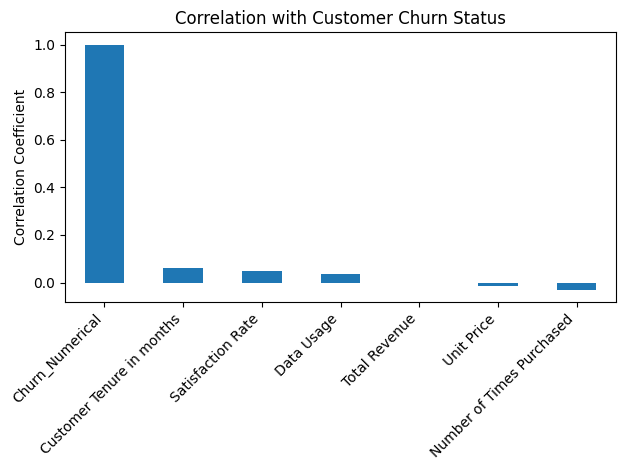

In [13]:
# Convert 'Customer Churn Status' to numerical (1 for Yes, 0 for No)
df['Churn_Numerical'] = df['Customer Churn Status'].map({'Yes': 1, 'No': 0})

# Select only the numerical columns and the new 'Churn_Numerical' column
numerical_cols = ['Age', 'Satisfaction Rate', 'Customer Tenure in months',
                  'Unit Price', 'Number of Times Purchased', 'Total Revenue', 'Data Usage', 'Churn_Numerical']
correlation_matrix = df[numerical_cols].corr()['Churn_Numerical'].sort_values(ascending=False)

print(correlation_matrix)

# We can also visualize this as a bar chart
import matplotlib.pyplot as plt
correlation_matrix[:-1].plot(kind='bar') # Exclude the correlation of Churn_Numerical with itself
plt.title('Correlation with Customer Churn Status')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Drop the temporary numerical churn column
df.drop('Churn_Numerical', axis=1, inplace=True)

Churn Rate by Tenure Category and Satisfaction Rate:
 Tenure Category  Satisfaction Rate
Short Tenure     1                    0.102564
                 2                    0.529412
                 3                    0.370370
                 4                    0.142857
                 5                    0.121212
Medium Tenure    1                    0.250000
                 2                    0.147541
                 3                    0.230769
                 4                    0.414894
                 5                    0.301370
Long Tenure      1                    0.307692
                 2                    0.316327
                 3                    0.320513
                 4                    0.222222
                 5                    0.462963
Name: Yes, dtype: float64


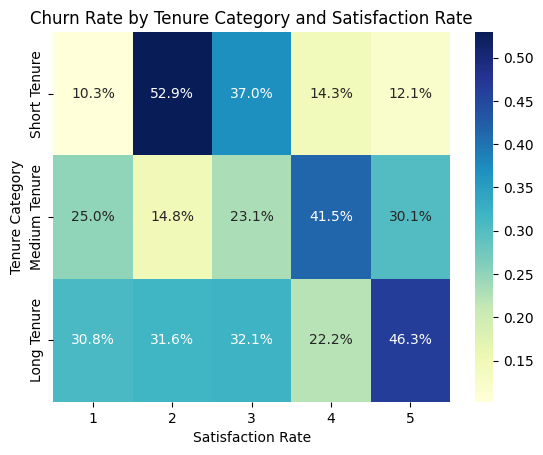

In [14]:
# Create tenure categories
bins = [0, 12, 36, df['Customer Tenure in months'].max()]
labels = ['Short Tenure', 'Medium Tenure', 'Long Tenure']
df['Tenure Category'] = pd.cut(df['Customer Tenure in months'], bins=bins, labels=labels, right=False)

# Group by Tenure Category and Satisfaction Rate and calculate churn rate
churn_by_tenure_satisfaction = df.groupby(['Tenure Category', 'Satisfaction Rate'])['Customer Churn Status'].value_counts(normalize=True).unstack().fillna(0)

print("Churn Rate by Tenure Category and Satisfaction Rate:\n", churn_by_tenure_satisfaction['Yes'])


pivot_table = churn_by_tenure_satisfaction['Yes'].reset_index()
pivot_table = pivot_table.pivot(index='Tenure Category', columns='Satisfaction Rate', values='Yes')

sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt=".1%")
plt.title('Churn Rate by Tenure Category and Satisfaction Rate')
plt.ylabel('Tenure Category')
plt.xlabel('Satisfaction Rate')
plt.show()

# Clean up the temporary tenure category column
df.drop('Tenure Category', axis=1, inplace=True)

Churn Rate by Customer Review and Satisfaction Rate:
 Satisfaction Rate         1         2         3        4         5
Customer Review                                                   
Excellent          0.000000  0.000000  0.000000  0.00000  0.331325
Fair               0.000000  0.306533  0.000000  0.00000  0.000000
Good               0.000000  0.000000  0.281407  0.00000  0.000000
Poor               0.247475  0.000000  0.000000  0.00000  0.000000
Very Good          0.000000  0.000000  0.000000  0.29717  0.000000


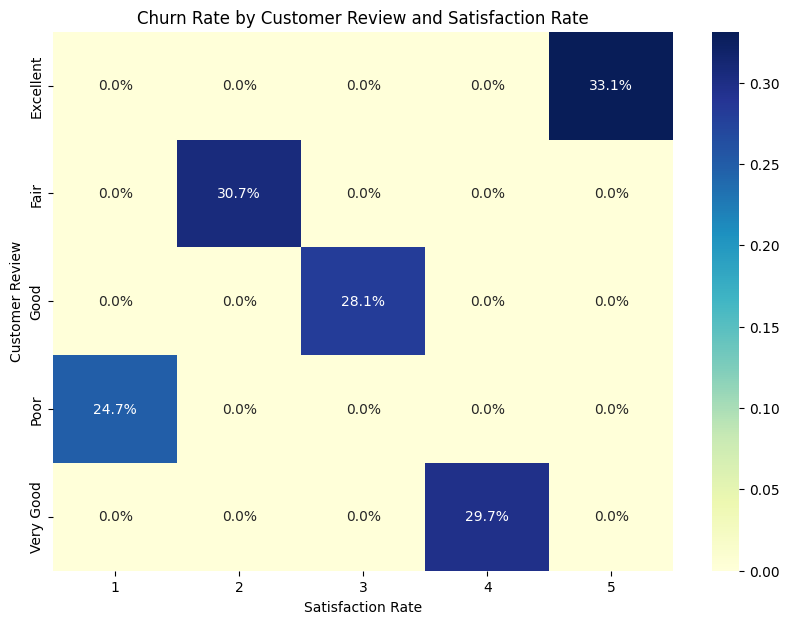

In [15]:
# Ensure 'Customer Churn Status' is numerically encoded for mean calculation (1 for Yes, 0 for No)

df['Churn_Numerical'] = df['Customer Churn Status'].map({'Yes': 1, 'No': 0})

# Group by Customer Review and Satisfaction Rate and calculate the mean churn rate
churn_by_review_satisfaction = df.groupby(['Customer Review', 'Satisfaction Rate'])['Churn_Numerical'].mean().unstack().fillna(0)

print("Churn Rate by Customer Review and Satisfaction Rate:\n", churn_by_review_satisfaction)

# Visualize using a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(churn_by_review_satisfaction, annot=True, cmap='YlGnBu', fmt=".1%")
plt.title('Churn Rate by Customer Review and Satisfaction Rate')
plt.ylabel('Customer Review')
plt.xlabel('Satisfaction Rate')
plt.show()

Churn Rate by Subscription Plan and Data Usage Quartile:
 Data Usage Quartile           Low Usage  Medium-Low Usage  Medium-High Usage  \
Subscription Plan                                                              
1.5GB 2-Day Plan               0.000000          0.250000           0.500000   
1.5TB Yearly Broadband Plan    0.000000          0.250000           0.363636   
10GB+10mins Monthly Plan       0.090909          0.227273           0.307692   
12.5GB Monthly Plan            0.250000          0.333333           0.181818   
120GB Monthly Broadband Plan   0.307692          0.117647           0.235294   
150GB FUP Monthly Unlimited    0.125000          0.285714           0.214286   
16.5GB+10mins Monthly Plan     0.200000          0.444444           0.250000   
165GB Monthly Plan             0.294118          0.352941           0.190476   
1GB+1.5mins Daily Plan         0.250000          0.333333           0.250000   
2.5GB 2-Day Plan               0.428571          0.250000     

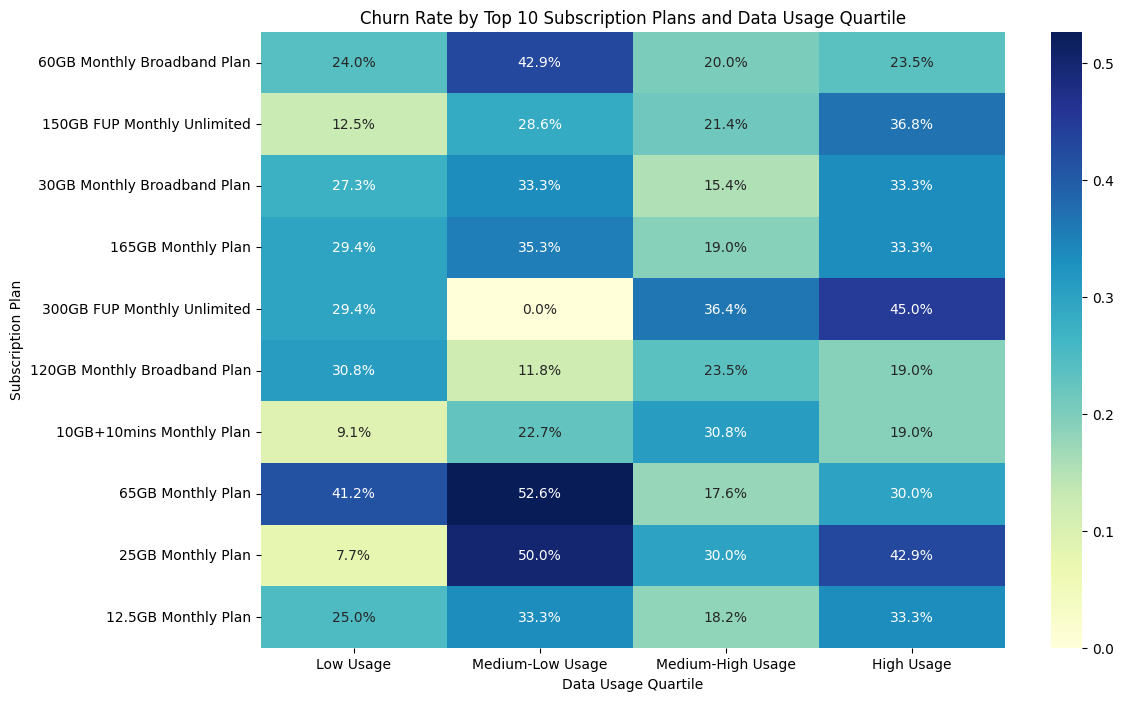

In [16]:
# Create data usage categories based on quartiles
df['Data Usage Quartile'] = pd.qcut(df['Data Usage'], q=4, labels=['Low Usage', 'Medium-Low Usage', 'Medium-High Usage', 'High Usage'])

# Group by Subscription Plan and Data Usage Quartile and calculate the mean churn rate
churn_by_plan_usage = df.groupby(['Subscription Plan', 'Data Usage Quartile'])['Churn_Numerical'].mean().unstack().fillna(0)

print("Churn Rate by Subscription Plan and Data Usage Quartile:\n", churn_by_plan_usage)

# Visualize using a heatmap (showing top N plans for readability)
top_n = 10  # Adjust as needed
top_plans = df['Subscription Plan'].value_counts().nlargest(top_n).index
churn_by_plan_usage_top = churn_by_plan_usage.loc[top_plans]

plt.figure(figsize=(12, 8))
sns.heatmap(churn_by_plan_usage_top, annot=True, cmap='YlGnBu', fmt=".1%")
plt.title(f'Churn Rate by Top {top_n} Subscription Plans and Data Usage Quartile')
plt.ylabel('Subscription Plan')
plt.xlabel('Data Usage Quartile')
plt.show()

# Clean up the temporary data usage quartile column
df.drop('Data Usage Quartile', axis=1, inplace=True)

In [17]:
# 1. Tenure Category (as defined before)
bins = [0, 12, 36, df['Customer Tenure in months'].max()]
labels = ['Short Tenure', 'Medium Tenure', 'Long Tenure']
df['Tenure Category'] = pd.cut(df['Customer Tenure in months'], bins=bins, labels=labels, right=False)

# 2. Purchase Frequency (Number of Times Purchased / Customer Tenure in months)
# Handle potential division by zero by setting frequency to 0 if tenure is 0 (though unlikely in this dataset)
df['Purchase Frequency'] = df.apply(lambda row: row['Number of Times Purchased'] / row['Customer Tenure in months']
                                    if row['Customer Tenure in months'] > 0 else 0, axis=1)

# Display the first few rows with the new features
print(df[['Customer ID', 'Customer Tenure in months', 'Tenure Category', 'Number of Times Purchased', 'Purchase Frequency']].head())

  Customer ID  Customer Tenure in months Tenure Category  \
0    CUST0001                          2    Short Tenure   
1    CUST0002                         22   Medium Tenure   
2    CUST0003                         60             NaN   
3    CUST0003                         60             NaN   
4    CUST0003                         60             NaN   

   Number of Times Purchased  Purchase Frequency  
0                         19            9.500000  
1                         12            0.545455  
2                          8            0.133333  
3                          8            0.133333  
4                         15            0.250000  


In [18]:
# Fill NaN values in 'Reasons for Churn' with 'No Churn'
df['Reasons for Churn'].fillna('No Churn', inplace=True)

# Display the value counts of 'Reasons for Churn' to see the distribution
print(df['Reasons for Churn'].value_counts())

# Display the first few rows with the filled 'Reasons for Churn' column
print("\nFirst few rows with filled 'Reasons for Churn':")
print(df[['Customer ID', 'Reasons for Churn']].head())

Reasons for Churn
No Churn                          690
High Call Tarriffs                 54
Better Offers from Competitors     52
Poor Network                       45
Costly Data Plans                  40
Poor Customer Service              34
Fast Data Consumption              32
Relocation                         27
Name: count, dtype: int64

First few rows with filled 'Reasons for Churn':
  Customer ID               Reasons for Churn
0    CUST0001                      Relocation
1    CUST0002  Better Offers from Competitors
2    CUST0003                        No Churn
3    CUST0003                        No Churn
4    CUST0003                        No Churn


In [19]:
# df.isnull().sum()

In [20]:
# Find the most frequent category in 'Tenure Category'
most_frequent_tenure = df['Tenure Category'].mode()[0]
print(f"The most frequent Tenure Category is: {most_frequent_tenure}")

# Fill NaN values in 'Tenure Category' with the most frequent category
df['Tenure Category'].fillna(most_frequent_tenure, inplace=True)

# Verify that there are no more missing values in 'Tenure Category'
print(f"Number of missing values in 'Tenure Category' after filling: {df['Tenure Category'].isnull().sum()}")

# Display the updated value counts
print("\nUpdated value counts for 'Tenure Category':")
print(df['Tenure Category'].value_counts())

The most frequent Tenure Category is: Long Tenure
Number of missing values in 'Tenure Category' after filling: 0

Updated value counts for 'Tenure Category':
Tenure Category
Long Tenure      418
Medium Tenure    395
Short Tenure     161
Name: count, dtype: int64


In [21]:
from sklearn.preprocessing import LabelEncoder

# Identify the categorical features
categorical_features = ['State', 'MTN Device', 'Gender', 'Subscription Plan', 'Customer Review', 'Tenure Category', 'Reasons for Churn']

# Create a LabelEncoder object
label_encoders = {}
for column in categorical_features:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Display the first few rows of the DataFrame with the encoded columns
print(df[categorical_features].head())

   State  MTN Device  Gender  Subscription Plan  Customer Review  \
0     22           0       1                  7                1   
1      1           3       0                  3                1   
2     31           1       1                  5                3   
3     31           3       1                  8                3   
4     31           2       1                 15                3   

   Tenure Category  Reasons for Churn  
0                2                  7  
1                1                  0  
2                0                  4  
3                0                  4  
4                0                  4  


In [22]:
# Columns to drop
columns_to_drop = ['Customer ID', 'Full Name', 'Date of Purchase', 'Customer Churn Status']

# Drop the specified columns
df = df.drop(columns=columns_to_drop, axis=1)

# Display the first few rows of the processed DataFrame
print(df.head())

# Display the remaining columns and their data types
print("\nRemaining columns and their data types:")
print(df.info())

   Age  State  MTN Device  Gender  Satisfaction Rate  Customer Review  \
0   27     22           0       1                  2                1   
1   16      1           3       0                  2                1   
2   21     31           1       1                  1                3   
3   21     31           3       1                  1                3   
4   21     31           2       1                  1                3   

   Customer Tenure in months  Subscription Plan  Unit Price  \
0                          2                  7       35000   
1                         22                  3        5500   
2                         60                  5       20000   
3                         60                  8         500   
4                         60                 15        9000   

   Number of Times Purchased  Total Revenue  Data Usage  Reasons for Churn  \
0                         19         665000       44.48                  7   
1                         

In [23]:
df.head()

,Age,State,MTN Device,Gender,Satisfaction Rate,Customer Review,Customer Tenure in months,Subscription Plan,Unit Price,Number of Times Purchased,Total Revenue,Data Usage,Reasons for Churn,Churn_Numerical,Tenure Category,Purchase Frequency
0,27,22,0,1,2,1,2,7,35000,19,665000,44.48,7,1,2,9.500000
1,16,1,3,0,2,1,22,3,5500,12,66000,19.79,0,1,1,0.545455
2,21,31,1,1,1,3,60,5,20000,8,160000,9.64,4,0,0,0.133333
3,21,31,3,1,1,3,60,8,500,8,4000,197.05,4,0,0,0.133333
4,21,31,2,1,1,3,60,15,9000,15,135000,76.34,4,0,0,0.250000


In [24]:
from sklearn.model_selection import train_test_split

# Define the features for x 
x_features = ['State', 'Satisfaction Rate', 'Customer Review', 'Customer Tenure in months',
              'Subscription Plan', 'Number of Times Purchased', 'Data Usage']

# Create x and y
x = df[x_features]
y = df['Churn_Numerical']


# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

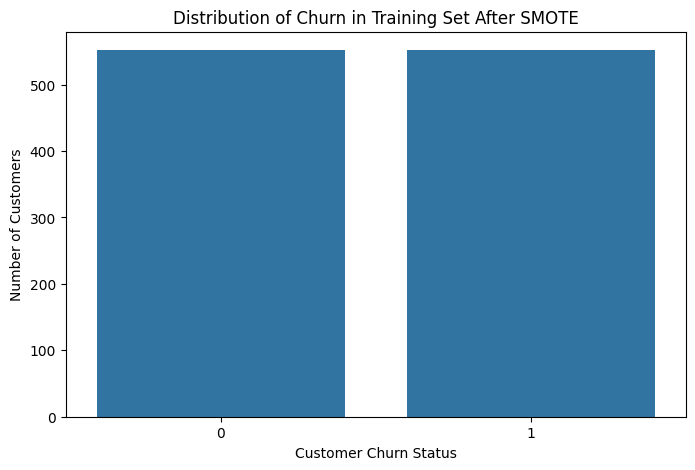

In [25]:
# handling class imbalance
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

# plot the distribution of the target variable in the training set
plt.figure(figsize=(8, 5))
sns.countplot(x=y_train)
plt.title('Distribution of Churn in Training Set After SMOTE')
plt.xlabel('Customer Churn Status')
plt.ylabel('Number of Customers')
plt.show()

In [26]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


# reduce dimensionality
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)


In [27]:

# training our models

# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
lr_pred = lr_model.predict(x_test)

# model evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Logistic Regression Classification Report:\n", classification_report(y_test, lr_pred))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, lr_pred))
print("Logistic Regression Accuracy Score:", accuracy_score(y_test, lr_pred))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.51      0.60       138
           1       0.32      0.54      0.40        57

    accuracy                           0.52       195
   macro avg       0.52      0.53      0.50       195
weighted avg       0.61      0.52      0.54       195

Logistic Regression Confusion Matrix:
 [[71 67]
 [26 31]]
Logistic Regression Accuracy Score: 0.5230769230769231


In [28]:
# svm
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf')
svm_model.fit(x_train, y_train)
svm_pred = svm_model.predict(x_test)

# model evaluation
print("SVM Classification Report:\n", classification_report(y_test, svm_pred))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, svm_pred))
print("SVM Accuracy Score:", accuracy_score(y_test, svm_pred))

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.67      0.69       138
           1       0.32      0.39      0.35        57

    accuracy                           0.58       195
   macro avg       0.52      0.53      0.52       195
weighted avg       0.61      0.58      0.59       195

SVM Confusion Matrix:
 [[92 46]
 [35 22]]
SVM Accuracy Score: 0.5846153846153846


In [29]:
# random forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)

# model evaluation
print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("Random Forest Accuracy Score:", accuracy_score(y_test, rf_pred))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.69      0.69       138
           1       0.27      0.28      0.28        57

    accuracy                           0.57       195
   macro avg       0.48      0.48      0.48       195
weighted avg       0.57      0.57      0.57       195

Random Forest Confusion Matrix:
 [[95 43]
 [41 16]]
Random Forest Accuracy Score: 0.5692307692307692


In [30]:
# xgboost
from xgboost import XGBClassifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(x_train, y_train)
xgb_pred = xgb_model.predict(x_test)

# model evaluation
print("XGBoost Classification Report:\n", classification_report(y_test, xgb_pred))
print("XGBoost Confusion Matrix:\n", confusion_matrix(y_test, xgb_pred))
print("XGBoost Accuracy Score:", accuracy_score(y_test, xgb_pred))

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.68      0.68       138
           1       0.24      0.25      0.24        57

    accuracy                           0.55       195
   macro avg       0.46      0.46      0.46       195
weighted avg       0.56      0.55      0.55       195

XGBoost Confusion Matrix:
 [[94 44]
 [43 14]]
XGBoost Accuracy Score: 0.5538461538461539


In [31]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
dt_pred = dt_model.predict(x_test)

# model evaluation
print("Decision Tree Classification Report:\n", classification_report(y_test, dt_pred))
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, dt_pred))
print("Decision Tree Accuracy Score:", accuracy_score(y_test, dt_pred))

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.70      0.73       138
           1       0.39      0.46      0.42        57

    accuracy                           0.63       195
   macro avg       0.57      0.58      0.57       195
weighted avg       0.65      0.63      0.64       195

Decision Tree Confusion Matrix:
 [[97 41]
 [31 26]]
Decision Tree Accuracy Score: 0.6307692307692307
